In [1]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


2113536/2110848 [==============================] - 16s 7us/step


In [2]:
print(len(train_data))
print(len(test_data))

8982
2246


In [12]:
train_data[0][:10]

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207]

In [10]:
#word_index is a dictionary mapping words to an integer index
word_index = reuters.get_word_index()

#We reverse it, mapping integer indices to words
reverse_word_index = dict ([(value,key) for (key,value) in word_index.items()])

#We decode the review, note that our indices are offset by 3, 
#because 0,1 and 2 are reversed indices for "padding", "start of sequence", and "unknown".
decoded_newswires = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

557056/550378 [==============================] - 6s 10us/step


In [11]:
decoded_newswires

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [13]:
train_labels[0]

3

In [23]:
print('categories of train labels ',min(train_labels),':',max(train_labels))

categories of train labels  0 : 45


### Encoding the integer sequeneces into a binary matrix

In [14]:
import numpy as np

def vectorize_sequences( sequences, dimension =10000):
    #Create an all-zero matrix of shape (len(sequences), dimensions)
    results = np.zeros((len(sequences), dimension))
    for i,sequence in enumerate(sequences):
        results[i, sequence] = 1. #set specific indices of results[i] to 1s
    return results

#Our vectorized training data
x_train = vectorize_sequences(train_data)
#Our vectorized test data
x_test = vectorize_sequences(test_data)

### One-hot encoding the labels

In [26]:
from keras.utils.np_utils import to_categorical

#vectorized training labels
one_hot_train_labels = to_categorical(train_labels)
#vectorized test labels
one_hot_test_labels = to_categorical(test_labels)

### Model

In [27]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation= 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))
model.compile(optimizer= 'rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
# Setting aside validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [29]:
history = model.fit(partial_x_train, partial_y_train,
                   epochs=9, batch_size= 512,
                   validation_data= (x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 3s 368us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/9
7982/7982 [==============================] - 1s 135us/step - loss: 1.4451 - acc: 0.6878 - val_loss: 1.3459 - val_acc: 0.7060
Epoch 3/9
7982/7982 [==============================] - 1s 144us/step - loss: 1.0953 - acc: 0.7651 - val_loss: 1.1708 - val_acc: 0.7430
Epoch 4/9
7982/7982 [==============================] - 1s 135us/step - loss: 0.8696 - acc: 0.8161 - val_loss: 1.0787 - val_acc: 0.7590
Epoch 5/9
7982/7982 [==============================] - 1s 123us/step - loss: 0.7033 - acc: 0.8478 - val_loss: 0.9842 - val_acc: 0.7820
Epoch 6/9
7982/7982 [==============================] - 1s 125us/step - loss: 0.5665 - acc: 0.8802 - val_loss: 0.9416 - val_acc: 0.8030
Epoch 7/9
7982/7982 [==============================] - 1s 154us/step - loss: 0.4581 - acc: 0.9045 - val_loss: 0.9070 - val_acc: 0.8020
Epoch 8

### Plotting the training and validation loss 

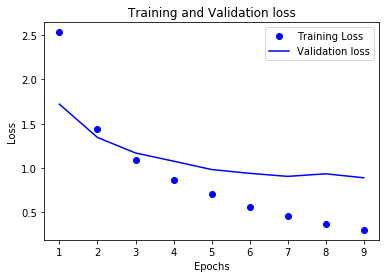

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

acc= history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) +1)

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label= 'Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

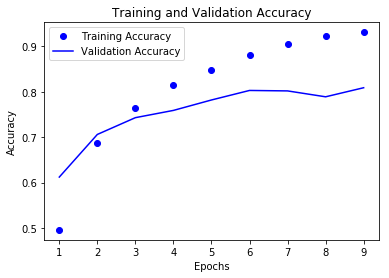

In [31]:
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label= 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Results

In [32]:
results = model.evaluate(x_test, one_hot_test_labels)
results

2246/2246 [==============================] - 0s 222us/step


[0.98057250241987, 0.7880676759212865]

### Prediction

In [33]:
model.predict(x_test)

array([[1.4097095e-05, 6.8857538e-05, 1.6052848e-06, ..., 2.4193835e-06,
        7.0662713e-06, 3.0875597e-07],
       [1.3731024e-03, 2.2366098e-03, 2.3611256e-05, ..., 9.8892278e-06,
        6.6788011e-06, 4.3143613e-05],
       [3.7160117e-02, 7.1204442e-01, 5.5853841e-03, ..., 2.4367083e-04,
        4.7885592e-04, 5.8522762e-04],
       ...,
       [5.2414271e-06, 4.0724834e-05, 5.6320591e-06, ..., 8.0885559e-07,
        8.3606928e-06, 3.6754156e-07],
       [1.2125375e-03, 7.9882771e-02, 1.5926008e-03, ..., 2.2968580e-04,
        2.1657240e-04, 3.5084930e-05],
       [1.3339922e-03, 4.7865954e-01, 8.5714161e-02, ..., 1.1605127e-04,
        3.4900917e-05, 1.8439410e-04]], dtype=float32)

#### Instead of encoding the labels we can cast them as integer tensors. Then our loss function needs to be sparse_categorical_encoding